In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [3]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
data = pd.read_csv('AI Sessions/LoanPredictionTrain.csv')

In [11]:
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_Term_360.0,Loan_Amount_Term_Other,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_status
0,0.116326,-0.993900,-0.228528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,N
1,-0.435433,-0.993900,-2.188582,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,Y
2,-0.704140,-0.049443,-0.767543,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,Y
3,-0.306321,-0.993900,-0.743042,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,N
4,-0.434881,1.907659,1.339516,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,N


In [16]:
data.shape

(394, 16)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data.iloc[:,:3].values,test_size=0.2)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
wcss = []
for i in range(1,16):
    print(i)
    kmeans = KMeans(n_clusters=i,init='k-means++',n_jobs=-1)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


Text(0.5, 1.0, 'Elbow Method')

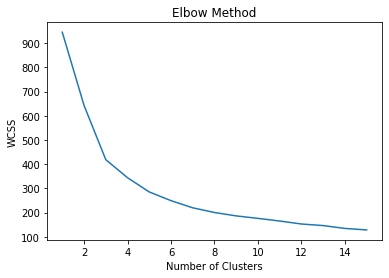

In [27]:
plt.plot(range(1,16),wcss,)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

### The optimum value of "K" should be 3

In [77]:
kmeans = KMeans(n_clusters=3,
                init='k-means++',
                n_jobs=-1)

In [29]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
kmeans.cluster_centers_

array([[-0.39745957, -0.57165122, -0.84028228],
       [ 1.37521763, -0.64725043,  0.8741096 ],
       [-0.43310085,  1.00113587,  0.34224578]])

In [31]:
kmeans.labels_

array([2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2,
       1, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 0,
       0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2,
       0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0,
       0, 2, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2,
       0, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 2, 2,
       1, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 2,
       0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0,

In [32]:
kmeans.inertia_

418.6944506611549

In [33]:
kmeans.n_iter_

11

In [34]:
y = kmeans.predict(X_test)
y

array([2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1,
       0, 2, 2, 1, 2, 0, 0, 2, 1, 0, 0, 2, 0], dtype=int32)

## DBSCAN

In [35]:
from sklearn.cluster import DBSCAN

In [69]:
dbscan = DBSCAN(eps=0.60)

In [70]:
clusters = dbscan.fit_predict(data[['ApplicantIncome','LoanAmount']].values)

In [71]:
np.unique(clusters)

array([-1,  0,  1])

In [72]:
dbscan_data = data[['ApplicantIncome','LoanAmount']]

In [73]:
dbscan_data['Clusters'] = clusters

/home/abhinandan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
dbscan_data.head()

,ApplicantIncome,LoanAmount,Clusters
0,0.116326,-0.228528,0
1,-0.435433,-2.188582,0
2,-0.704140,-0.767543,0
3,-0.306321,-0.743042,0
4,-0.434881,1.339516,0


In [75]:
for cluster,df in dbscan_data.groupby(['Clusters']):
    print(cluster)
    print(df.describe())

-1
       ApplicantIncome  LoanAmount  Clusters
count        12.000000   12.000000      12.0
mean          1.351438    1.443643      -1.0
std           2.078527    1.656755       0.0
min          -2.099538   -2.433589      -1.0
25%           0.221850    0.604495      -1.0
50%           2.264875    2.148038      -1.0
75%           2.914847    2.589050      -1.0
max           3.335288    3.054563      -1.0
0
       ApplicantIncome  LoanAmount  Clusters
count       375.000000  375.000000     375.0
mean         -0.100939   -0.073814       0.0
std           0.823674    0.926989       0.0
min          -2.066432   -2.654095       0.0
25%          -0.711037   -0.620539       0.0
50%          -0.251146   -0.081524       0.0
75%           0.357445    0.457491       0.0
max           2.645589    2.564550       0.0
1
       ApplicantIncome  LoanAmount  Clusters
count         7.000000    7.000000       7.0
mean          3.090701    1.479519       1.0
std           0.150824    0.091361       0.0
min

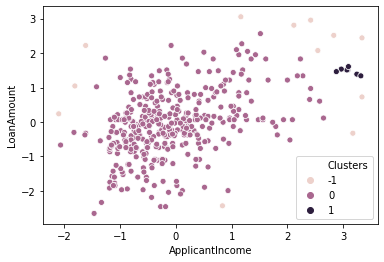

In [76]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='Clusters',data=dbscan_data)

In [78]:
clusters_kmeans = kmeans.fit_predict(data[['ApplicantIncome','LoanAmount']].values)

In [79]:
dbscan_data['KMeans_Clusters'] = clusters_kmeans

/home/abhinandan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


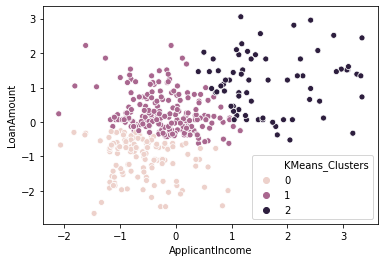

In [80]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',hue='KMeans_Clusters',data=dbscan_data)